<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n250.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

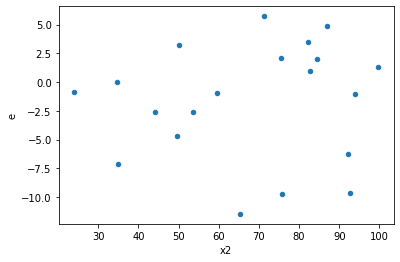

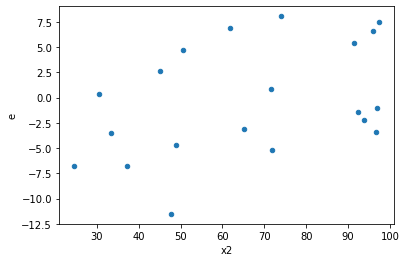

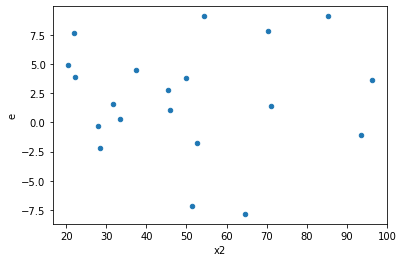

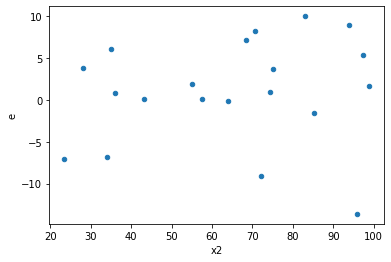

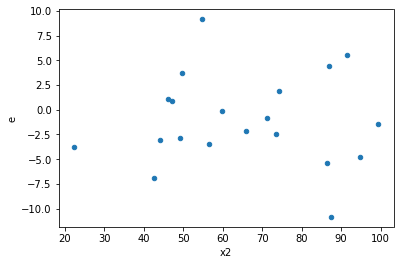

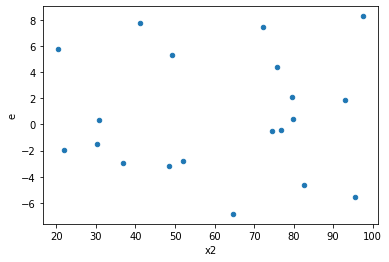

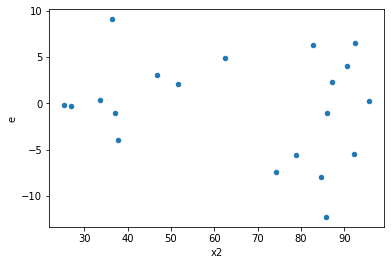

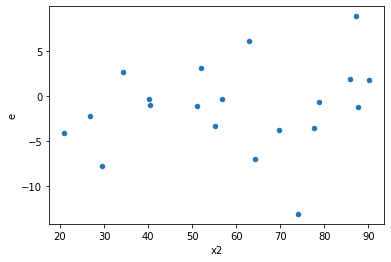

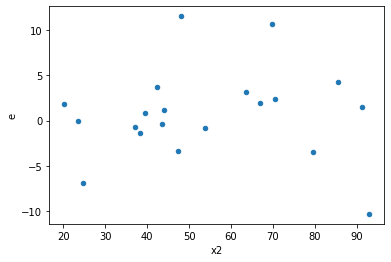

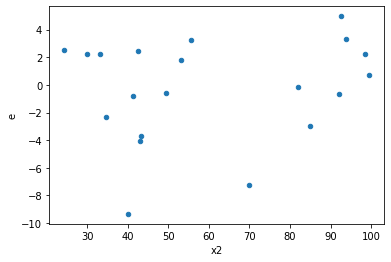

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,43.626369045885774,59.60830703895977,10.906592261471443,14.902076759739943,1.366336652410022,0.7696375774109825,0.6151812112945088,0.38481878870549124,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,59.37001036514669,104.1891229195536,14.842502591286673,26.0472807298884,1.754911651164509,0.5992522454720461,0.7003738772639769,0.29962612273602307,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,32.58665763091195,343.7598302768563,8.146664407727988,85.93995756921407,10.549097553066108,0.04238703307646752,0.9788064834617662,0.02119351653823376,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,76.83507447798488,91.3558509239168,19.20876861949622,22.8389627309792,1.1889863001316214,0.8708191447835074,0.5645904276082463,0.4354095723917537,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,6.528244782010063,107.35726904283578,1.6320611955025157,26.839317260708945,16.445043442409066,0.01896203864013435,0.9905189806799328,0.009481019320067174,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,31.175864422210505,123.01501532238768,7.793966105552626,30.75375383059692,3.9458413616511803,0.212222155093301,0.8938889224533495,0.1061110775466505,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,36.71858737456349,89.3682884252187,9.179646843640873,22.342072106304673,2.43387054936454,0.4100536213455612,0.7949731893272194,0.2050268106727806,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,21.852505229373865,81.26854898784393,5.463126307343466,20.317137246960982,3.7189579929080057,0.23137347871113234,0.8843132606444338,0.11568673935556617,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,27.845656677385627,66.28611188084571,6.961414169346407,16.571527970211427,2.3804829833544146,0.42149792144405174,0.7892510392779741,0.21074896072202587,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,43.626369045885774,59.60830703895977,10.906592261471443,14.902076759739943,1.366336652410022,0.7696375774109825,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,120.61313088670735,97.07198875126562,30.153282721676838,24.267997187816405,0.8048210674710528,0.8384177233891933,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,59.37001036514669,104.1891229195536,14.842502591286673,26.0472807298884,1.754911651164509,0.5992522454720461,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,32.58665763091195,343.7598302768563,8.146664407727988,85.93995756921407,10.549097553066108,0.04238703307646752,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,76.83507447798488,91.3558509239168,19.20876861949622,22.8389627309792,1.1889863001316214,0.8708191447835074,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,6.528244782010063,107.35726904283578,1.6320611955025157,26.839317260708945,16.445043442409066,0.01896203864013435,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,31.175864422210505,123.01501532238768,7.793966105552626,30.75375383059692,3.9458413616511803,0.212222155093301,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,33.1859877355599,1.1776132088545526,8.296496933889975,0.29440330221363814,0.03548525414516141,0.006885289526388075,Reject001=0 : Heteroscedasticity
8.0,4.0,4.0,36.71858737456349,89.3682884252187,9.179646843640873,22.342072106304673,2.43387054936454,0.4100536213455612,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      950
Reject001=0 : Heteroscedasticity     50
Name: Result_test, dtype: int64